In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import jieba
from jieba import analyse
% matplotlib inline
# % matplotlib qt5
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
train = pd.read_csv('DMSC.csv')
# val = train[150000:]
# train = train[:1500000]
# train = train.loc[np.random.choice(train.index, 100000)]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125056 entries, 0 to 2125055
Data columns (total 10 columns):
ID               int64
Movie_Name_EN    object
Movie_Name_CN    object
Crawl_Date       object
Number           int64
Username         object
Date             object
Star             int64
Comment          object
Like             int64
dtypes: int64(4), object(6)
memory usage: 162.1+ MB


In [28]:
train.Dateate[0]

Timestamp('2015-05-13 00:00:00')

In [3]:

data = train.groupby(['Movie_Name_CN', 'Star'])


In [ ]:
tmp = data.Star.count().unstack()
tmp = tmp.loc[list(tmp.sum(axis=1).sort_values().index)]

In [22]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.figure(figsize=(9, 7))
# tmp.plot(kind='bar', stacked=True)

# sns.stripplot(x='Movie_Name_CN', y='Star', data=train, jitter=True)
# tmp.reset_index(level=0)
# plt.xlabel('Movies english name')
# plt.show()

In [3]:
# tmp1 = train[train['Movie_Name_CN'] == '钢铁侠1']
tmp1 = train
tmp1['Date'] = pd.to_datetime(train['Date'])

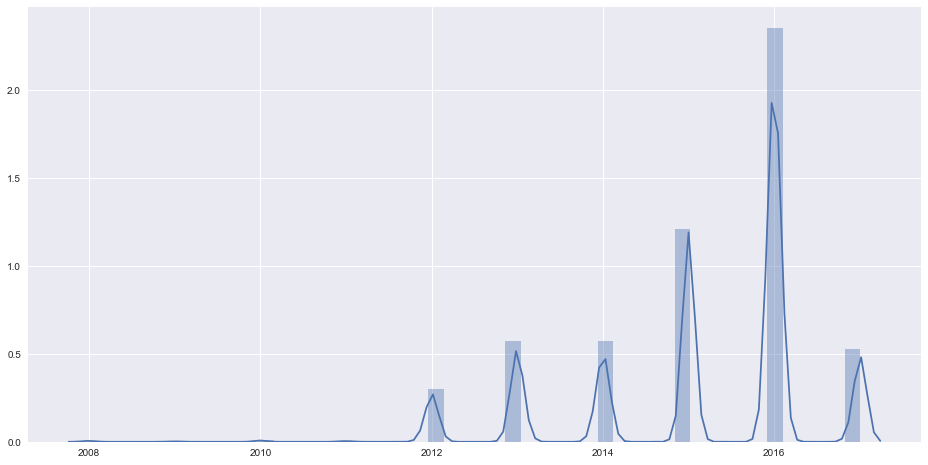

In [26]:
plt.figure(figsize=(16,8))
tmp2 = tmp1['Date'].dt.year.sort_index()
# tmp2 = tmp2[tmp2 > 1]
# tmp2.plot(kind='bar')
sns.distplot(tmp2.values)
# plt.xaxis_date()
# plt.show()

In [215]:
train['Movie_Name_CN'].value_counts()

疯狂动物城     137511
大圣归来      133393
后会无期      120200
寻龙诀       113687
你的名字      113260
夏洛特烦恼     109162
釜山行       102876
爱乐之城       96620
西游伏妖篇      91452
小时代1       88903
泰囧         85677
大鱼海棠       83692
长城         83173
西游降魔篇      79962
复仇者联盟      78281
美人鱼        73882
七月与安生      68359
美国队长3      64410
变形金刚4      58746
复仇者联盟2     54153
十二生肖       46233
九层妖塔       44366
小时代3       41152
左耳         39802
湄公河行动      35093
栀子花开       30475
何以笙箫默      26797
钢铁侠1       23739
Name: Movie_Name_CN, dtype: int64

In [85]:

reviews = train[train['Movie_Name_CN'] == '钢铁侠1'].Comment.map(lambda x: analyse.extract_tags(x, topK=10))
text = ''
for review in reviews:
    text += " ".join(review) + " "

font_path = 'E:\czf10\Downloads\msyhbd.ttc'
my_wordcloud = WordCloud(
    font_path=font_path,
    background_color="white",
    width=500, height=400, margin=2
)
my_wordcloud.generate(text)
plt.axis("off")
plt.imshow(my_wordcloud)
plt.show()

In [4]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = (lambda x:analyse.extract_tags(x, topK=None)),
#                              preprocessor = None, \
#                              stop_words = None,   \
#                              stop_words = nltk.corpus.stopwords.words("english"),   \
#                              token_pattern = '[A-z]*',
                             max_features = 5000) 

In [6]:
train_data_features = vectorizer.fit_transform(train.Comment)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\czf10\AppData\Local\Temp\jieba.cache
Loading model cost 0.877 seconds.
Prefix dict has been built succesfully.


In [12]:
import time
print("Start time:", time.ctime(time.time()))
parameters = {
     # 'n_estimators': (100, 200, 400),
     'max_depth': (16, 24),
     'min_samples_split': (8, 16),
     'min_samples_leaf': (4, 12, 16)
}
forest = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=1, verbose=2)
start = time.time()
clf = GridSearchCV(forest, parameters, cv=5, n_jobs=-1, verbose=5)
clf.fit(train_data_features, train.Comment)
print(clf.best_score_, clf.best_params_)
print("End time:", time.ctime(time.time()))
print('Use {} mins'.format((time.time()-start)/60))

Start time: Mon Jun 11 19:45:22 2018
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\czf10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\czf10\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\czf10\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000002546EC0D6F0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\czf10\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\c...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000002546EC0D6F0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\czf10\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\c...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': False, 'code': 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'output_type': '', 'silent': False, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 11, 11, 45, 22, 847927, tzinfo=tzutc()), 'msg_id': '17e7e633-1e5e-47de-9099-5a735e129e8f', 'msg_type': 'execute_request', 'session': '88123a71-4345-4447-829c-6924529481d4', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '17e7e633-1e5e-47de-9099-5a735e129e8f', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'25f580d3-30067c21f547ee6f7366fd34']
        msg = {'buffers': [], 'content': {'allow_stdin': False, 'code': 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'output_type': '', 'silent': False, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 11, 11, 45, 22, 847927, tzinfo=tzutc()), 'msg_id': '17e7e633-1e5e-47de-9099-5a735e129e8f', 'msg_type': 'execute_request', 'session': '88123a71-4345-4447-829c-6924529481d4', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '17e7e633-1e5e-47de-9099-5a735e129e8f', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'25f580d3-30067c21f547ee6f7366fd34'], parent={'buffers': [], 'content': {'allow_stdin': False, 'code': 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'output_type': '', 'silent': False, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 11, 11, 45, 22, 847927, tzinfo=tzutc()), 'msg_id': '17e7e633-1e5e-47de-9099-5a735e129e8f', 'msg_type': 'execute_request', 'session': '88123a71-4345-4447-829c-6924529481d4', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '17e7e633-1e5e-47de-9099-5a735e129e8f', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = False
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', silent=False, store_history=True, user_expressions={}, allow_stdin=False)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Import object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-12-1848db4be331>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 25427beddd8, executio..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000002542EA10030, file "<ipython-input-12-1848db4be331>", line 12>
        result = <ExecutionResult object at 25427beddd8, executio..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000002542EA10030, file "<ipython-input-12-1848db4be331>", line 12>, result=<ExecutionResult object at 25427beddd8, executio..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000002542EA10030, file "<ipython-input-12-1848db4be331>", line 12>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nimport re...idSearchCV\nimport jieba\nfrom jieba import analyse', "train = pd.read_csv('DMSC.csv')\n# val = train[15... train.loc[np.random.choice(train.index, 100000)]", "train = pd.read_csv('NLP/DMSC.csv')\n# val = trai... train.loc[np.random.choice(train.index, 100000)]", 'vectorizer = CountVectorizer(analyzer = "word", ...                            max_features = 5000) ', 'train_data_features = vectorizer.fit_transform(train.Comment)', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))'], 'Out': {}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, '_': '', '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nimport re...idSearchCV\nimport jieba\nfrom jieba import analyse', "train = pd.read_csv('DMSC.csv')\n# val = train[15... train.loc[np.random.choice(train.index, 100000)]", "train = pd.read_csv('NLP/DMSC.csv')\n# val = trai... train.loc[np.random.choice(train.index, 100000)]", 'vectorizer = CountVectorizer(analyzer = "word", ...                            max_features = 5000) ', 'train_data_features = vectorizer.fit_transform(train.Comment)', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))', 'import time\nprint("Start time:", time.ctime(time...int(\'Use {} mins\'.format((time.time()-start)/60))'], 'Out': {}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, '_': '', '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
D:\czf10\Documents\CZF_Program\Python\notebook\<ipython-input-12-1848db4be331> in <module>()
      7      'min_samples_leaf': (4, 12, 16)
      8 }
      9 forest = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=1, verbose=2)
     10 start = time.time()
     11 clf = GridSearchCV(forest, parameters, cv=5, n_jobs=-1, verbose=5)
---> 12 clf.fit(train_data_features, train.Comment)
     13 print(clf.best_score_, clf.best_params_)
     14 print("End time:", time.ctime(time.time()))
     15 print('Use {} mins'.format((time.time()-start)/60))

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...ain_score='warn',
       scoring=None, verbose=5), X=<100000x5000 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>, y=278671                                          ...有感动了
Name: Comment, Length: 100000, dtype: object, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=5, random_state=None, shuffle=False)>
        X = <100000x5000 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>
        y = 278671                                          ...有感动了
Name: Comment, Length: 100000, dtype: object
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Mon Jun 11 21:52:25 2018
PID: 8140                 Python 3.6.3: C:\Users\czf10\Anaconda3\python.exe
...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=2, warm_start=False), <100000x5000 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>, 278671                                          ...有感动了
Name: Comment, Length: 100000, dtype: object, {'score': <function _passthrough_scorer>}, array([    0,     1,     2, ..., 99997, 99998, 99999]), array([  933,  1485,  2487, ..., 99846, 99946, 99951]), 5, {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 8}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=2, warm_start=False), <100000x5000 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>, 278671                                          ...有感动了
Name: Comment, Length: 100000, dtype: object, {'score': <function _passthrough_scorer>}, array([    0,     1,     2, ..., 99997, 99998, 99999]), array([  933,  1485,  2487, ..., 99846, 99946, 99951]), 5, {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 8})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=2, warm_start=False), X=<100000x5000 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>, y=278671                                          ...有感动了
Name: Comment, Length: 100000, dtype: object, scorer={'score': <function _passthrough_scorer>}, train=array([    0,     1,     2, ..., 99997, 99998, 99999]), test=array([  933,  1485,  2487, ..., 99846, 99946, 99951]), verbose=5, parameters={'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 8}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestClas...ue, random_state=1, verbose=2, warm_start=False)>
        X_train = <96508x5000 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>
        y_train = 278671                                          ...没有感动了
Name: Comment, Length: 96508, dtype: object
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=2, warm_start=False), X=<96508x5000 sparse matrix of type '<class 'numpy...ored elements in Compressed Sparse Column format>, y=array([[ 89746.],
       [ 60225.],
       [ 433...  [ 82925.],
       [ 58823.],
       [ 34036.]]), sample_weight=None)
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 
    333         if self.oob_score:
--> 334             self._set_oob_score(X, y)
        self._set_oob_score = <bound method ForestClassifier._set_oob_score of...ue, random_state=1, verbose=2, warm_start=False)>
        X = <96508x5000 sparse matrix of type '<class 'numpy...ored elements in Compressed Sparse Column format>
        y = array([[ 89746.],
       [ 60225.],
       [ 433...  [ 82925.],
       [ 58823.],
       [ 34036.]])
    335 
    336         # Decapsulate classes_ attributes
    337         if hasattr(self, "classes_") and self.n_outputs_ == 1:
    338             self.n_classes_ = self.n_classes_[0]

...........................................................................
C:\Users\czf10\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _set_oob_score(self=RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=2, warm_start=False), X=<96508x5000 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>, y=array([[ 89746.],
       [ 60225.],
       [ 433...  [ 82925.],
       [ 58823.],
       [ 34036.]]))
    432         oob_decision_function = []
    433         oob_score = 0.0
    434         predictions = []
    435 
    436         for k in range(self.n_outputs_):
--> 437             predictions.append(np.zeros((n_samples, n_classes_[k])))
        predictions.append = <built-in method append of list object>
        n_samples = 96508
        n_classes_ = [94458]
        k = 0
    438 
    439         for estimator in self.estimators_:
    440             unsampled_indices = _generate_unsampled_indices(
    441                 estimator.random_state, n_samples)

MemoryError: 
___________________________________________________________________________

In [1]:
# forest = RandomForestClassifier(
#     n_estimators=100, 
#     n_jobs=8,
#     max_depth=24,
#     min_samples_split=4,
#     min_samples_leaf=16
# )
# forest.fit(train_data_features, train.Star)

In [2]:
# val_data_features = vectorizer.transform(val.Comment)
# # result = forest.predict(test_data_features)
# forest.score(test_data_features, val.Star)